In [125]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.datasets import  load_wine
from sklearn.cluster import  KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score, adjusted_rand_score
import matplotlib.cm as cm
from sklearn.preprocessing import  StandardScaler

In [134]:
# load dataset
df = load_wine(as_frame=True)
data = df['frame']
# data shapes
data.shape

(178, 14)

In [135]:
# look at data
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [136]:
# look at class distribution
data['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

## a) Cluster the dataset using the k-Means clustering algorithm without using the class information as part of the features. Experiment with different numbers of clusters ranging from 2 to 5. What is the variability of the resulting clusters as a function of different initializations? Use the Silhouette coefficient and Adjusted Rand Index as metrics for evaluation.

In [137]:
# implementing k-means clustering for different number of clusters
for i in range(2, 6):
    kmeans = KMeans(n_clusters=i, max_iter=300, 
                      init='k-means++',n_init=10, random_state=13).fit_predict(data.iloc[:, :-1])
    print(f'{i} clusters: ')
    print(*["Cluster "+str(j)+": "+ str(sum(kmeans==j)) for j in range(i)], sep='\n')

2 clusters: 
Cluster 0: 123
Cluster 1: 55
3 clusters: 
Cluster 0: 69
Cluster 1: 47
Cluster 2: 62
4 clusters: 
Cluster 0: 56
Cluster 1: 23
Cluster 2: 66
Cluster 3: 33
5 clusters: 
Cluster 0: 57
Cluster 1: 20
Cluster 2: 26
Cluster 3: 27
Cluster 4: 48


## At the moment we pretend that we don't know true number of classes. In case of two clusters we see that we have one big cluster and one smaller(123 and 55). In other cases algorithm doesn't distinguish such big cluster(123), so we can suggest that so big cluster doesn't really exist and we have more than 2 clusters. We have also noticed that in every case apears cluster with 57+-2 instances. Maybe it is well separable cluster so it is present in every case.

For n_clusters = 2 The average silhouette_score is : 0.6568536504294317
For n_clusters = 3 The average silhouette_score is : 0.571138193786884
For n_clusters = 4 The average silhouette_score is : 0.5611347173642891
For n_clusters = 5 The average silhouette_score is : 0.5489993239795681


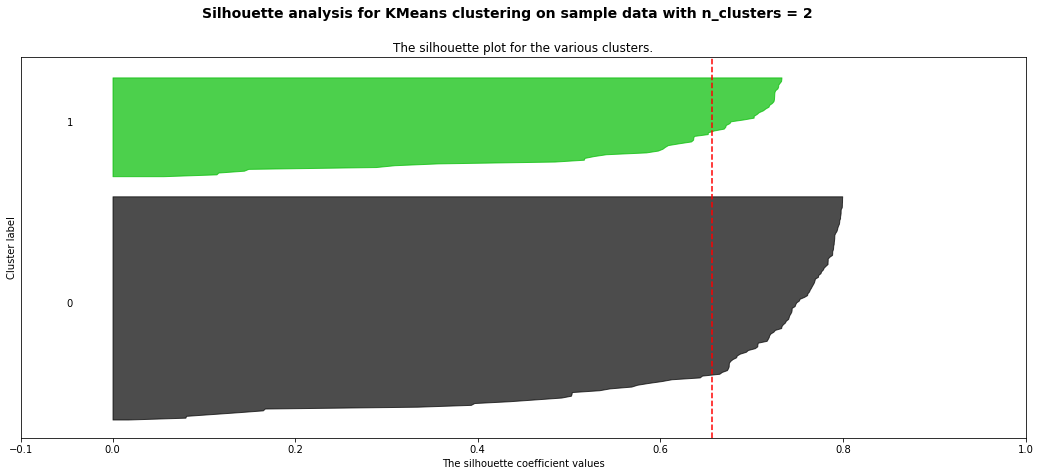

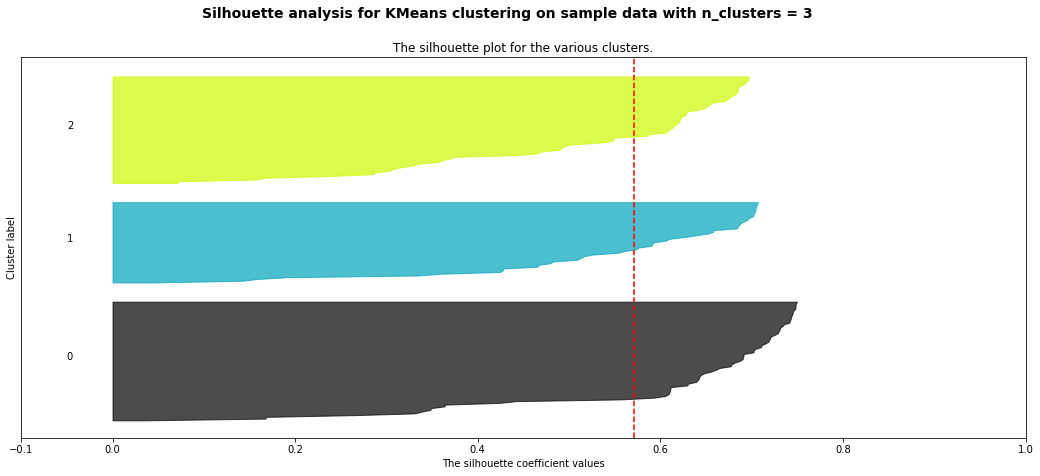

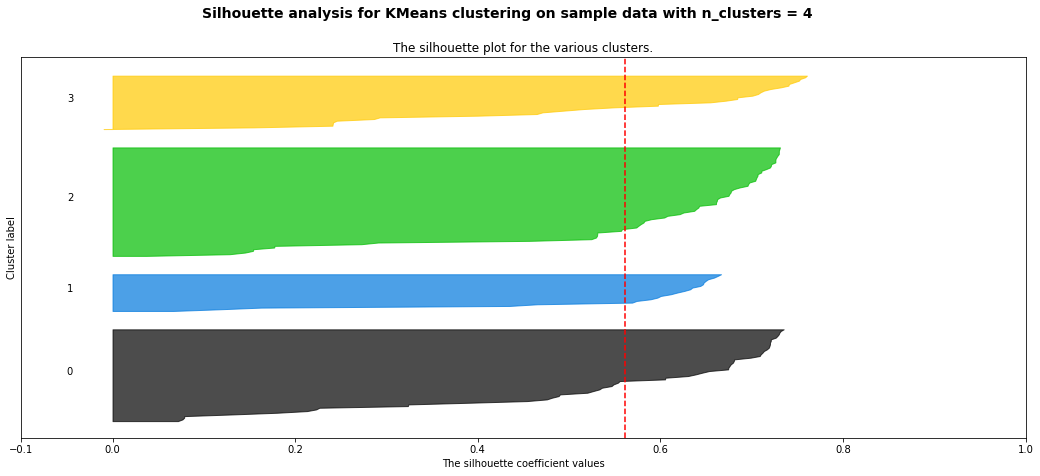

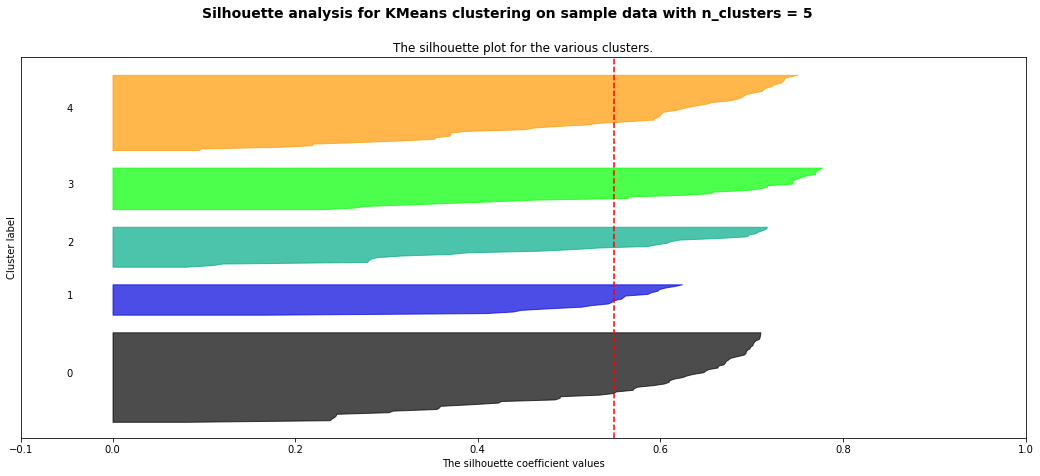

In [138]:
# silhouette metrics for evaluation
for n_clusters in range(2,6):
    # Create a subplot with 1 row and 2 columns
    fig, ax = plt.subplots()
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(data.iloc[:, :-1]) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 13 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=13)
    cluster_labels = clusterer.fit_predict(data.iloc[:, :-1])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data.iloc[:, :-1], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data.iloc[:, :-1], cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## The best silhouette score we get for 2 clusters and almost the same values for 3-5 clusters(better one for 3 clusters). But we know that we really have 3 clusters - it is sufficient drawback of clustering.

In [139]:
# adjusted rand index metrics for evaluation
for i in range(2,6):
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 13 for reproducibility.
    clusterer = KMeans(n_clusters=i, random_state=13)
    cluster_labels = clusterer.fit_predict(data.iloc[:, :-1])
    ari = adjusted_rand_score(data['target'], cluster_labels)
    print(f'Number of clusters: {i}, ARI score: {ari}')

Number of clusters: 2, ARI score: 0.3694075388574537
Number of clusters: 3, ARI score: 0.37111371823084754
Number of clusters: 4, ARI score: 0.29791661225323435
Number of clusters: 5, ARI score: 0.31158801033176253


## Here we can see the best score for 3 clusters(correct number of clusters). Other values are less. This metric penalizes impure class assignment. But we still see that the best score is far from 1(perfect clusterization). Maybe K-means algorithm doesn't suitable for our data.

## b) Cluster the dataset using DBSCAN without using the class information as part of the features. Experiment with different values for the parameters Eps and minPts. It’s up to you how you deal with any outliers, but make sure your criterion is properly justified. What is the variability of the resulting clusters as a function of different initializations? Use the Silhouette coefficient and Adjusted Rand Index as metrics for evaluation.

In [140]:
# implementing DBSCAN clustering for different number of clusters and different parameters
# default parameters
dbscan = DBSCAN().fit_predict(data.iloc[:, :-1].values)
# noise points are assigned -1
print('Default params:')
print("Number of Noise Points: ",sum(dbscan==-1)," (",len(dbscan),")",sep='')


Default params:
Number of Noise Points: 178 (178)


## As we see default dbscan assigns all points to 1 cluster(noise points). It works completely wrong. 

In [141]:
# try different parameters, lets vary eps(the maximum distance between two samples for one to be considered as in the neighborhood of the other)
eps = [0.001, 0.01, 1, 5, 10, 20, 30, 40, 50, 60, 100]
for i in eps:
    dbscan = DBSCAN(eps=i, min_samples=5).fit_predict(data.iloc[:, :-1])
    # noise points are assigned -1
    print(f'Eps = {i}')
    print("Number of Noise Points: ",sum(dbscan==-1)," (",len(dbscan),")",sep='')
    print(f'Number of clusters: {len(np.unique(dbscan))}')
    print(f'Clusters: {pd.Series(dbscan).value_counts()}')
    print('-' * 25)

Eps = 0.001
Number of Noise Points: 178 (178)
Number of clusters: 1
Clusters: -1    178
dtype: int64
-------------------------
Eps = 0.01
Number of Noise Points: 178 (178)
Number of clusters: 1
Clusters: -1    178
dtype: int64
-------------------------
Eps = 1
Number of Noise Points: 178 (178)
Number of clusters: 1
Clusters: -1    178
dtype: int64
-------------------------
Eps = 5
Number of Noise Points: 178 (178)
Number of clusters: 1
Clusters: -1    178
dtype: int64
-------------------------
Eps = 10
Number of Noise Points: 148 (178)
Number of clusters: 6
Clusters: -1    148
 1      7
 0      7
 2      6
 4      5
 3      5
dtype: int64
-------------------------
Eps = 20
Number of Noise Points: 45 (178)
Number of clusters: 7
Clusters:  3    50
-1    45
 4    43
 2    12
 0    12
 1    10
 5     6
dtype: int64
-------------------------
Eps = 30
Number of Noise Points: 20 (178)
Number of clusters: 5
Clusters:  1    114
-1     20
 0     19
 3     13
 2     12
dtype: int64
--------------

## DBSCAN performs poor for different eps values. The best values are 40 and 50. We can see that for low and high values dbscan assigns all values to 1 cluster(noise points). For intermediate values we can see from 2 to 7 clusters, algorithm shows high varability

In [142]:
# try different min_samples values
min_samp = [10, 20, 30, 40, 50, 60]
for i in min_samp:
    dbscan = DBSCAN(eps=40, min_samples=i).fit_predict(data.iloc[:, :-1])
    # noise points are assigned -1
    print(f'Min samples = {i}')
    print("Number of Noise Points: ",sum(dbscan==-1)," (",len(dbscan),")",sep='')
    print(f'Number of clusters: {len(np.unique(dbscan))}')
    print(f'Clusters: {pd.Series(dbscan).value_counts()}')
    print('-' * 25)

Min samples = 10
Number of Noise Points: 19 (178)
Number of clusters: 5
Clusters:  1    114
 0     20
-1     19
 2     13
 3     12
dtype: int64
-------------------------
Min samples = 20
Number of Noise Points: 99 (178)
Number of clusters: 3
Clusters: -1    99
 0    42
 1    37
dtype: int64
-------------------------
Min samples = 30
Number of Noise Points: 178 (178)
Number of clusters: 1
Clusters: -1    178
dtype: int64
-------------------------
Min samples = 40
Number of Noise Points: 178 (178)
Number of clusters: 1
Clusters: -1    178
dtype: int64
-------------------------
Min samples = 50
Number of Noise Points: 178 (178)
Number of clusters: 1
Clusters: -1    178
dtype: int64
-------------------------
Min samples = 60
Number of Noise Points: 178 (178)
Number of clusters: 1
Clusters: -1    178
dtype: int64
-------------------------


## the best possible result we get using eps = 40, min samples = 20. For min samples values higher than 20 algorithm assigns all points to 1 cluster. Let's look for different metrics score.

For n_clusters = 3 The average silhouette_score is : 0.1688496471952545


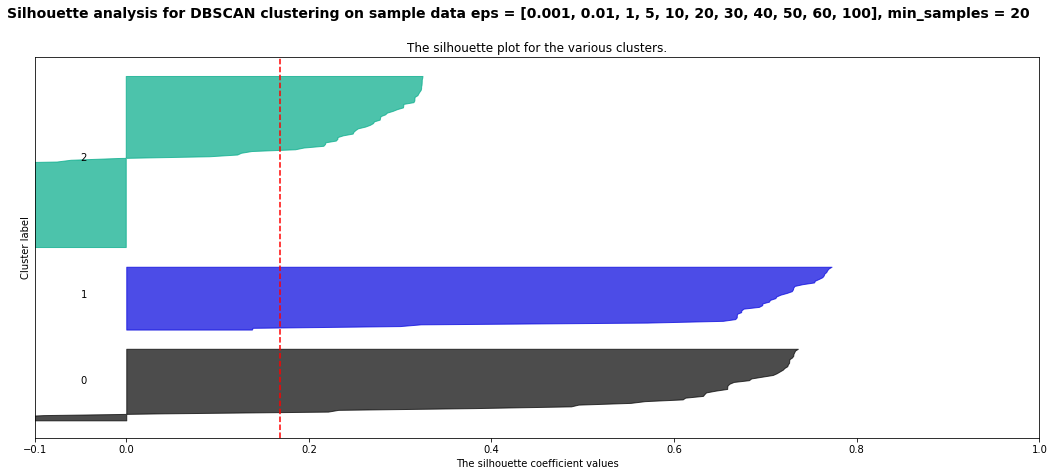

In [143]:
clusterer = DBSCAN(eps=40, min_samples=20)
cluster_labels = clusterer.fit_predict(data.iloc[:, :-1])
# replace -1 label for further convenience
cluster_labels = [max(cluster_labels) + 1 if i == -1 else i for i in cluster_labels]
# Create a subplot with 1 row and 2 columns
fig, ax = plt.subplots()
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax.set_ylim([0, len(data.iloc[:, :-1]) + (len(np.unique(cluster_labels)) + 1) * 10])

    

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(data.iloc[:, :-1].values, cluster_labels)
print("For n_clusters =", len(np.unique(cluster_labels)), "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(data.iloc[:, :-1].values, cluster_labels)
y_lower = 10
for i in np.unique(cluster_labels):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax.set_title("The silhouette plot for the various clusters.")
ax.set_xlabel("The silhouette coefficient values")
ax.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

ax.set_yticks([])  # Clear the yaxis labels / ticks
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.suptitle((f"Silhouette analysis for DBSCAN clustering on sample data eps = {eps}, min_samples = {min_s} "),
                 fontsize=14, fontweight='bold')

plt.show()


In [119]:
# adjusted rand index metrics for evaluation
clusterer = DBSCAN(eps=40, min_samples=20)
cluster_labels = clusterer.fit_predict(data.iloc[:, :-1])
ari = adjusted_rand_score(data['target'], cluster_labels)
print(f'ARI score: {ari}')

ARI score: 0.19360165798349546


## Even the best DBSCAN clusterer which we have found tuning hyperparmpeters performs very poor. Both of metrics have low score: silhouette score = 0.17 and ARI = 0.19, less than 0.2. Perfect result is 1 for both metrics. This algorithm performs more or less decent in very narrow range of hyperparameters.

## c) Summarize your findings and comparison after experimenting with these two clustering methods

## First of all i will briefly describe 2 algorithms:
## K-means clustering, also known as Partitioning Clustering, where objects are classified into one of K-groups. First of all randomly an initial centroids are chosen for each randomly partitioning clusters. Next, we compute the clusters means again, using the cases that are assigned to the clusters; then, we reclassify all cases based on the new set of means. We keep repeating this step until cluster means don’t change between successive steps. Finally, we calculate the means of cluster once again and assign the cases to their permanent clusters.

## DBSCAN means Density-based Spatial Clustering of Applications with noise. DBSCAN is used in the formation of clusters irrespective of shape, size and location of the clusters. It works on two main concepts, that is, Density Reachability and Density Connectability. Both these concepts is depending on two parameters of the DBSCAN clustering; the size of epsilon neighbourhood e and the minimum points in the cluster m

## We can see that K-means performs much better. This algorithm performs better for convex clusters so maybe it is the reason. DBSCAN works better for roll-shaped clusters. We saw that tuning hyperparameters we can change the performance of clustering algorithm. In case we do not have labels clustering can be challenging. We saw that silhouette metric is not always precise. I think we should make dimensionality reduction first and then plot clusterization results.